In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fifa19 = pd.read_csv(r"C:\Users\91700\Desktop\Files\Full stack Data Science and AI Course all Material\14th June EDA Practical\Seaborn\FIFA.csv", index_col=0)

In [4]:
fifa19

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [5]:
fifa19.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Internation

In [7]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

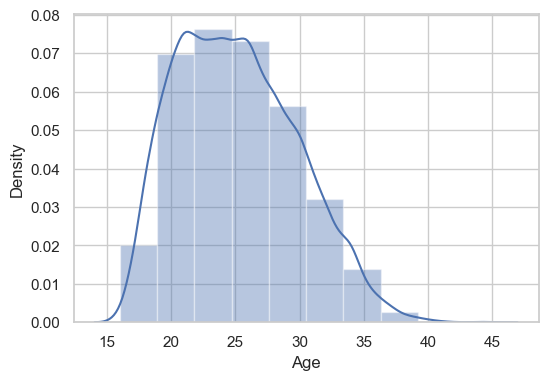

In [8]:
f, ax = plt.subplots(figsize=(6,4))
x = fifa19['Age']
ax = sns.distplot(x, bins=10)
plt.show()

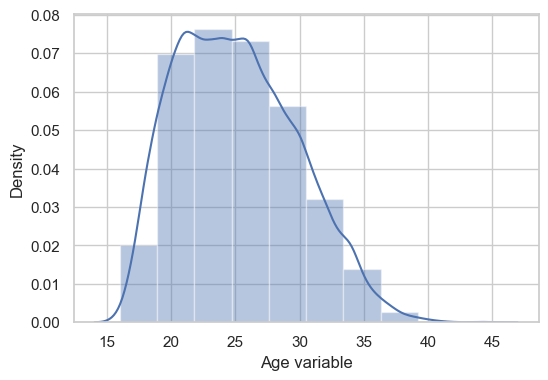

In [9]:
f, ax = plt.subplots(figsize=(6,4))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10)
plt.show()

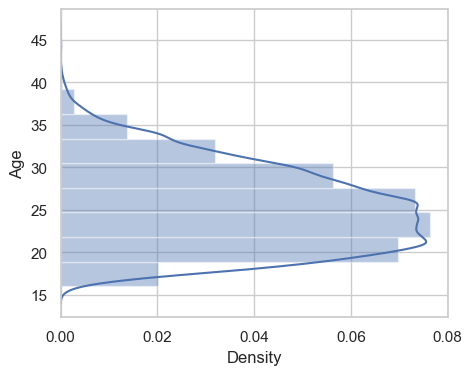

In [10]:
f, ax = plt.subplots(figsize=(5,4))
x = fifa19['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

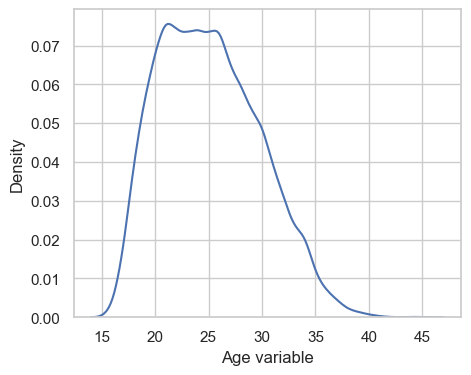

In [11]:
f, ax = plt.subplots(figsize=(5,4))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

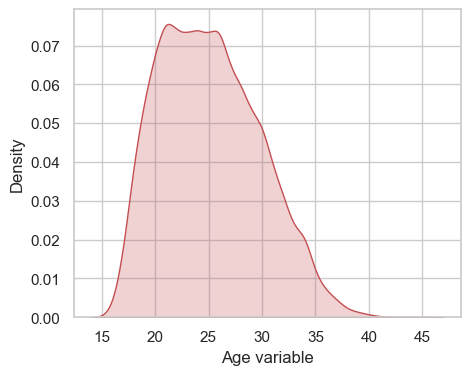

In [12]:
f, ax = plt.subplots(figsize=(5,4))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

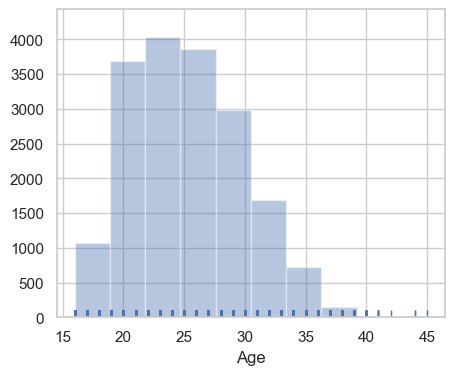

In [13]:
f, ax = plt.subplots(figsize=(5,4))
x = fifa19['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

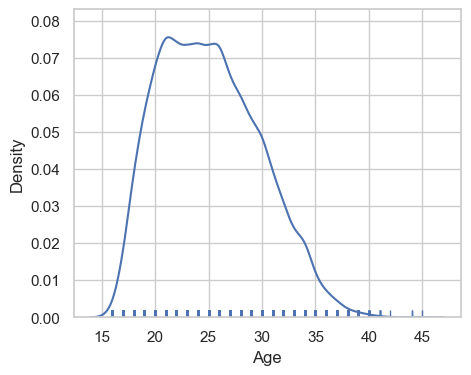

In [14]:
f, ax = plt.subplots(figsize=(5,4))
x = fifa19['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

In [15]:
fifa19['Preferred Foot'].nunique()

2

In [16]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

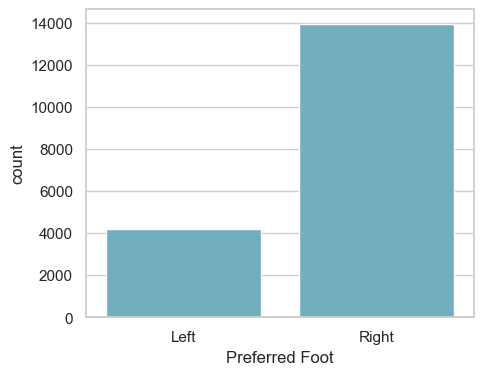

In [17]:
f, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="Preferred Foot", data=fifa19, color="c")
plt.show()

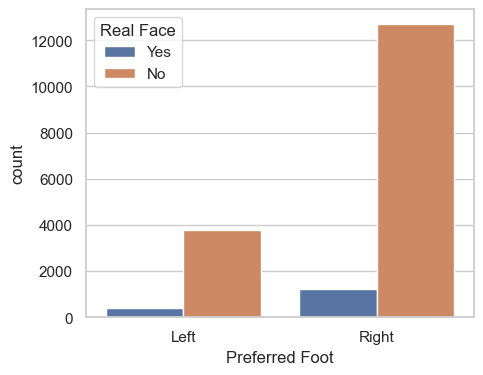

In [18]:
f, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa19)
plt.show()

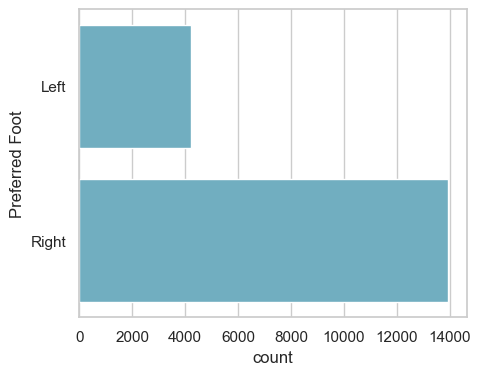

In [19]:
f, ax = plt.subplots(figsize=(5,4))
sns.countplot(y="Preferred Foot", data=fifa19, color="c")
plt.show()

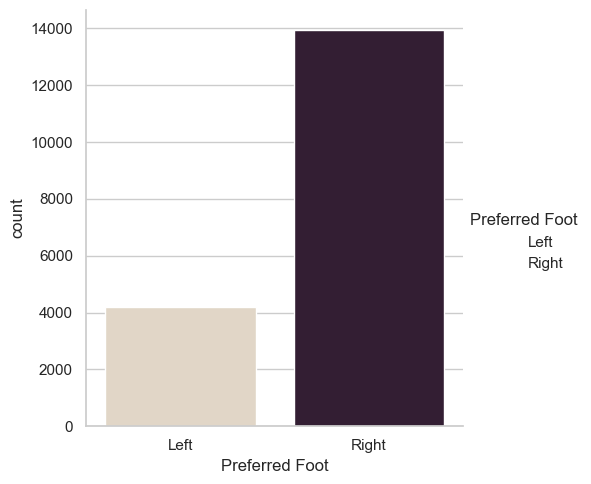

In [20]:
g = sns.catplot(x="Preferred Foot", kind="count", palette="ch:.25", data=fifa19)
plt.show()

In [21]:
fifa19['International Reputation'].nunique()

5

In [22]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

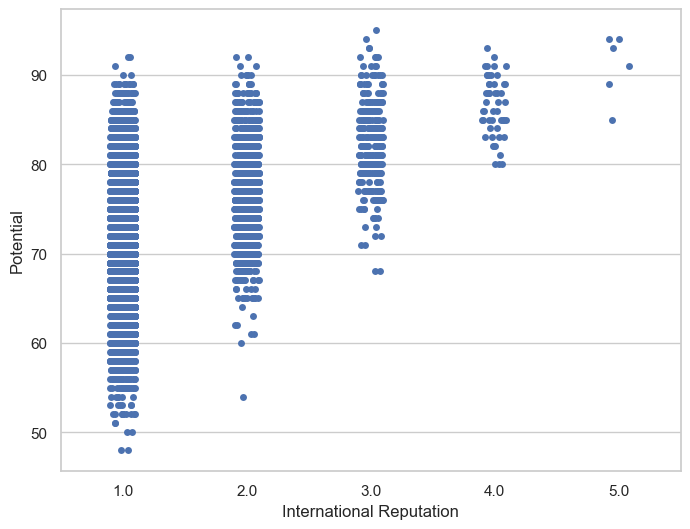

In [23]:
f, ax = plt.subplots(figsize=(8,6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

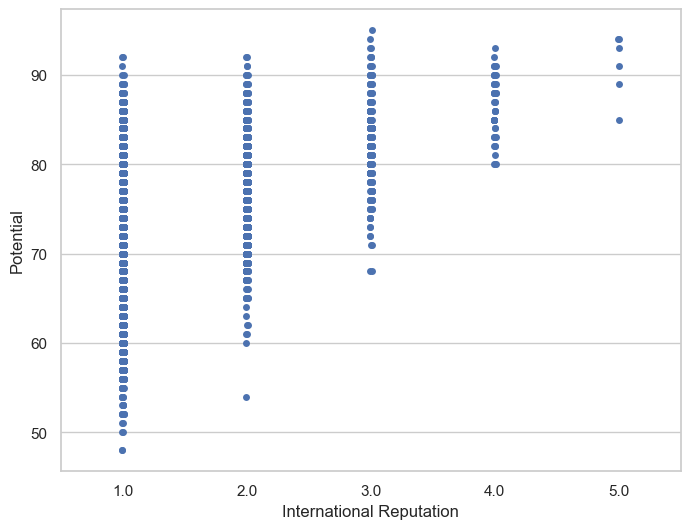

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19, jitter=0.01)
plt.show()

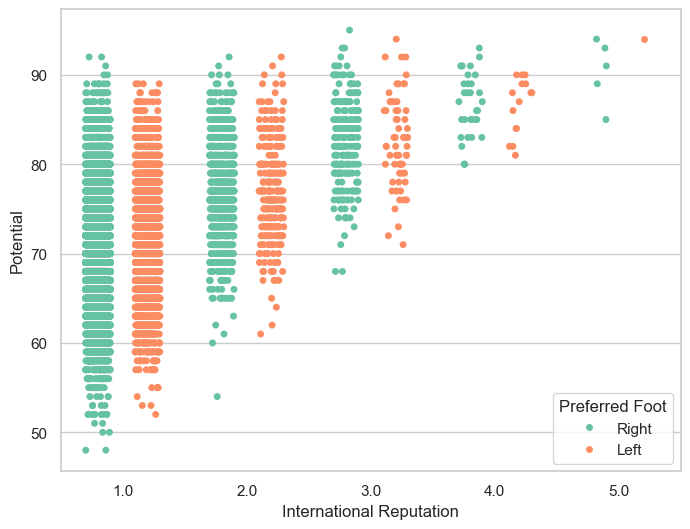

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, jitter=0.2, palette="Set2", dodge=True)
plt.show()

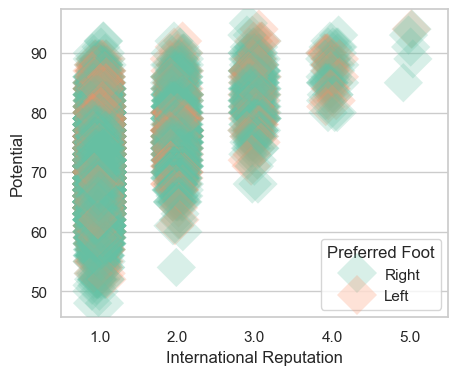

In [26]:
f, ax = plt.subplots(figsize=(5,4))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()

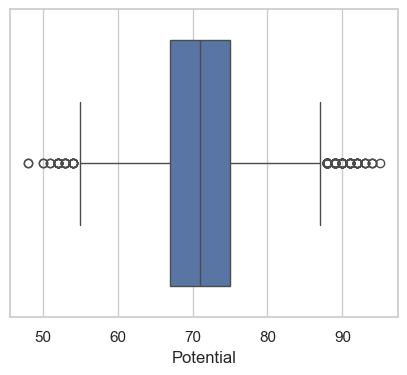

In [27]:
f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x=fifa19["Potential"])
plt.show()

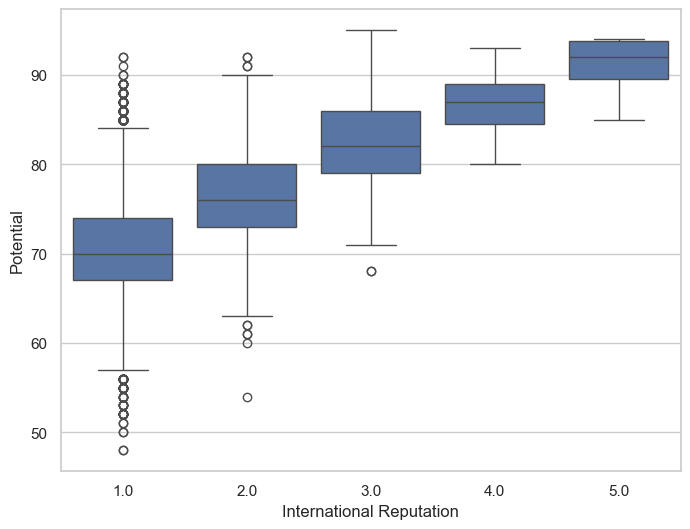

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

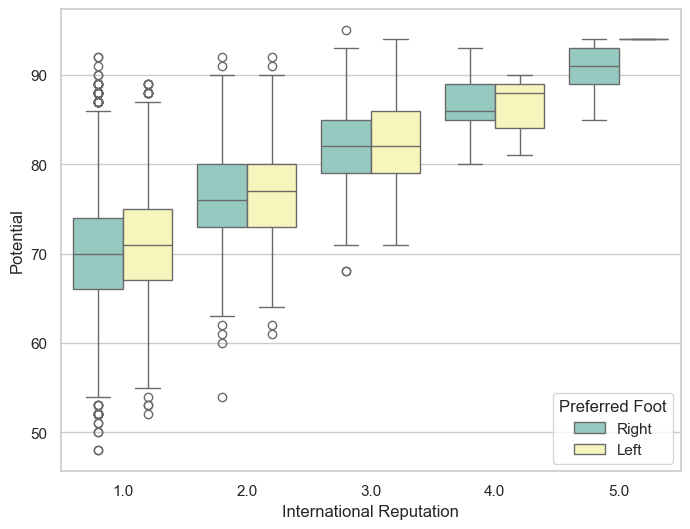

In [29]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set3")
plt.show()

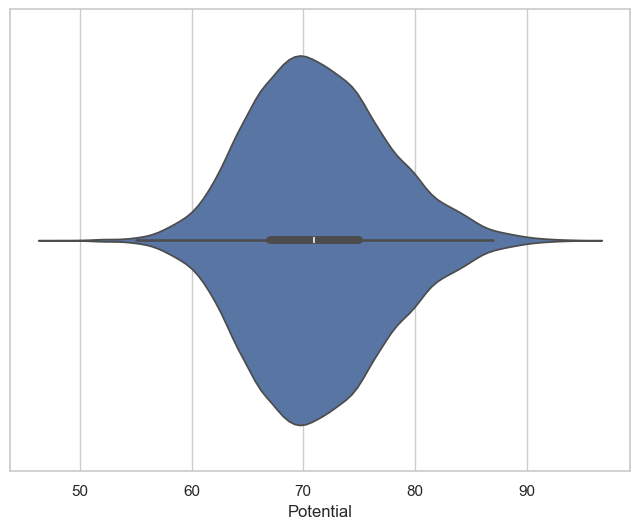

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa19["Potential"])
plt.show()

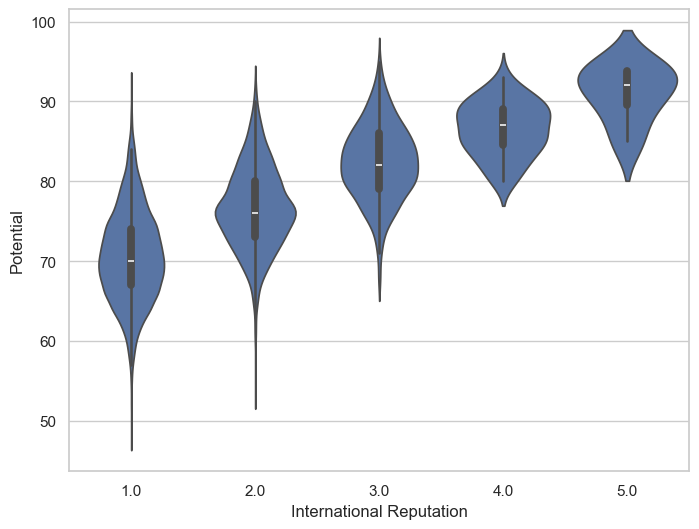

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

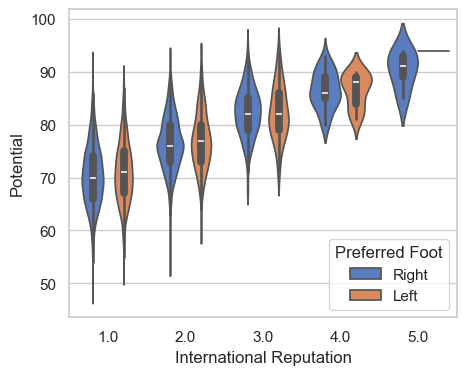

In [32]:
f, ax = plt.subplots(figsize=(5, 4))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="muted")
plt.show()

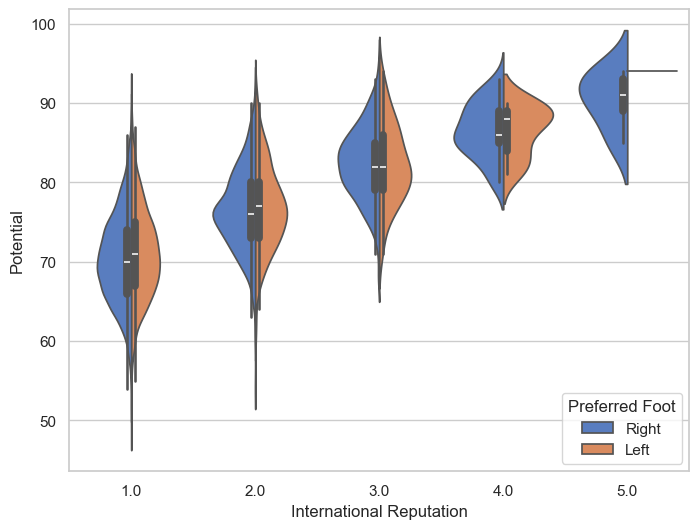

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa19, palette="muted", split=True)
plt.show()

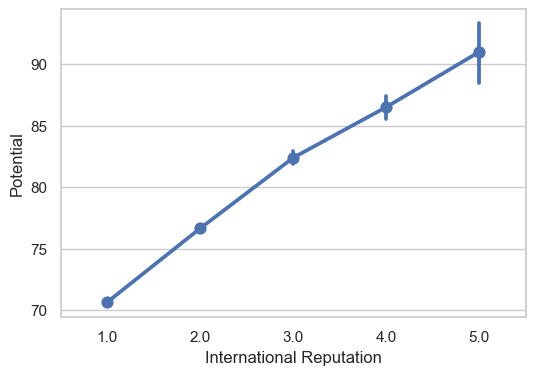

In [34]:
f, ax = plt.subplots(figsize=(6, 4))
sns.pointplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

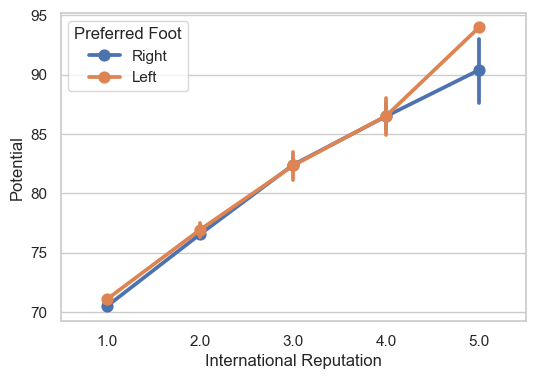

In [35]:
f, ax = plt.subplots(figsize=(6, 4))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

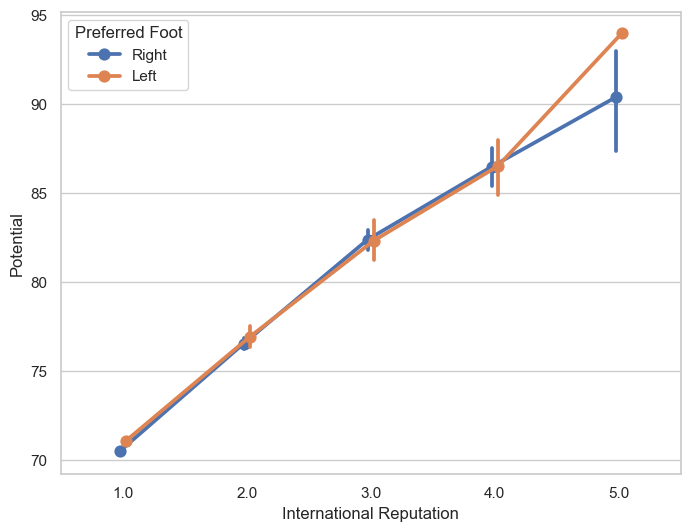

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, dodge=True)
plt.show()

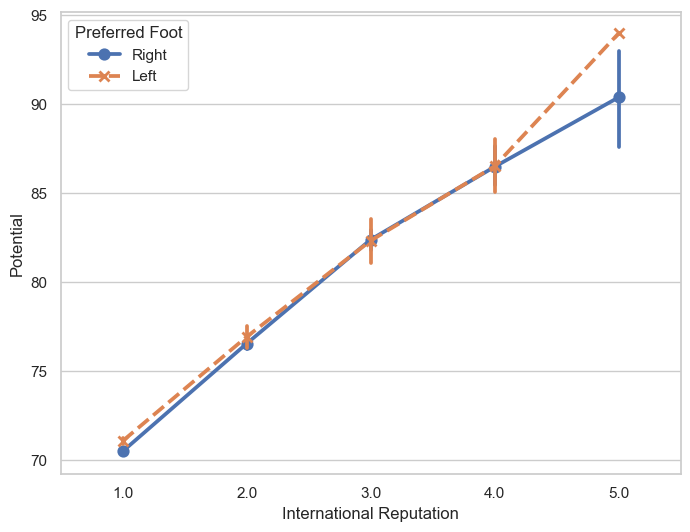

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa19, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

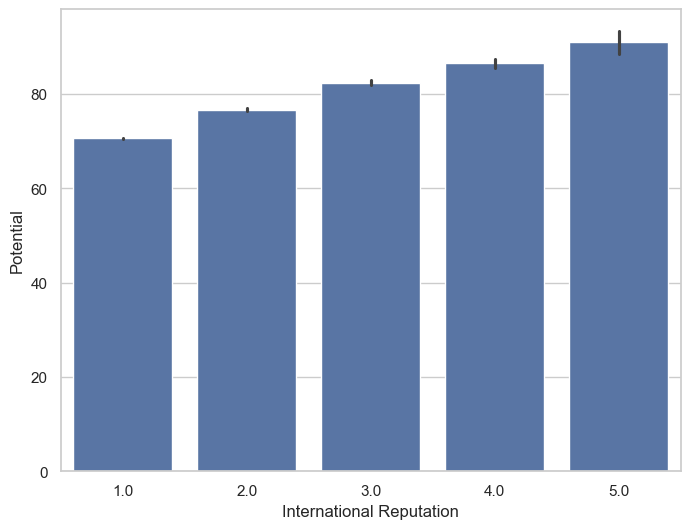

In [38]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

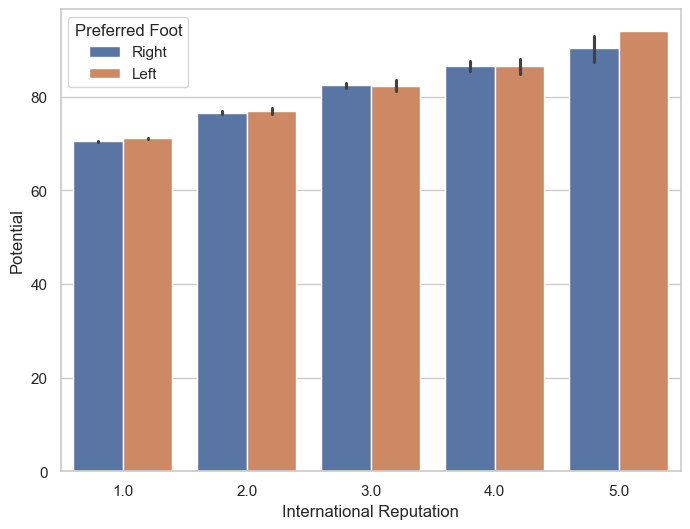

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

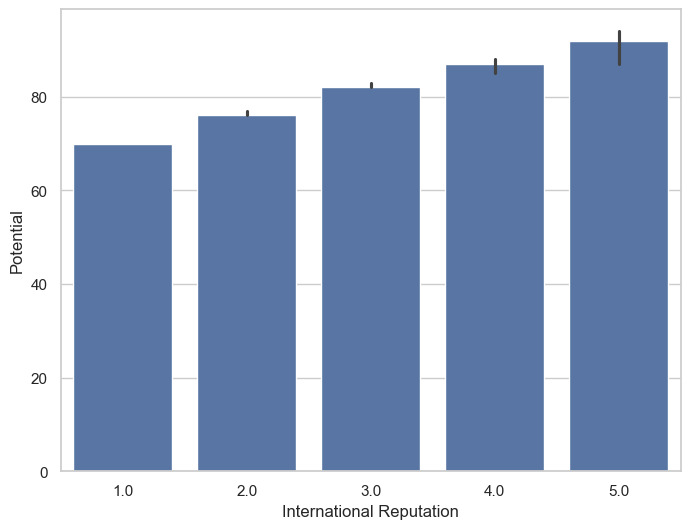

In [40]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, estimator=median)
plt.show()

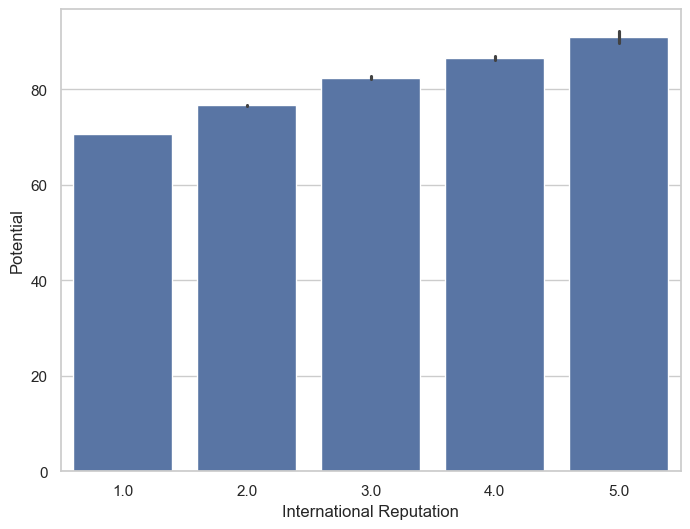

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci=68)
plt.show()

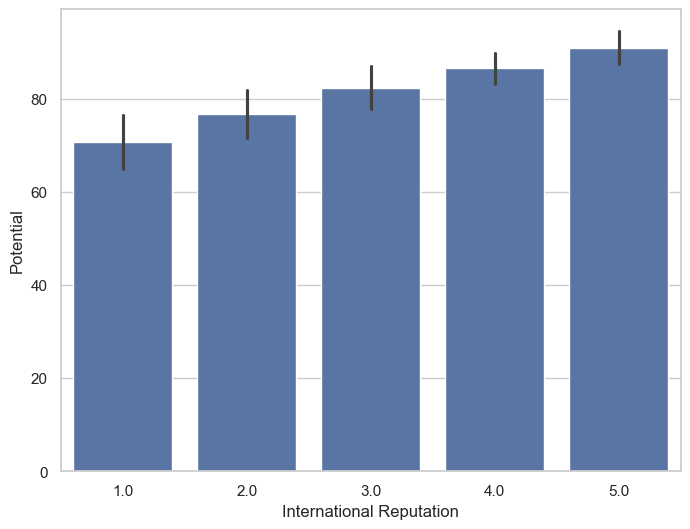

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci="sd")
plt.show()

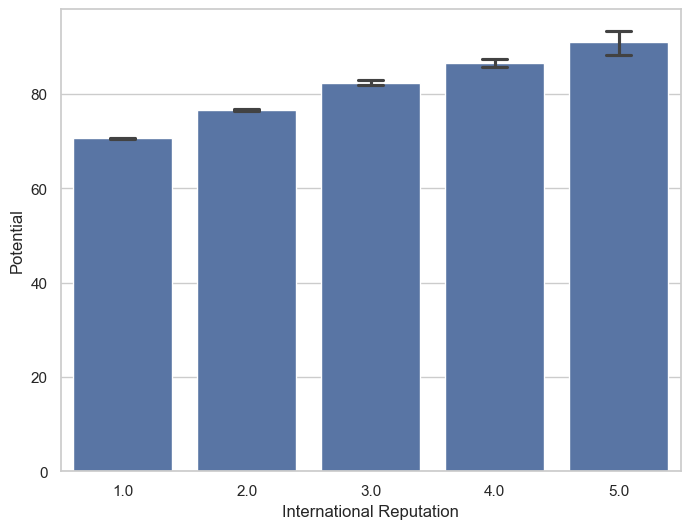

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, capsize=0.2)
plt.show()

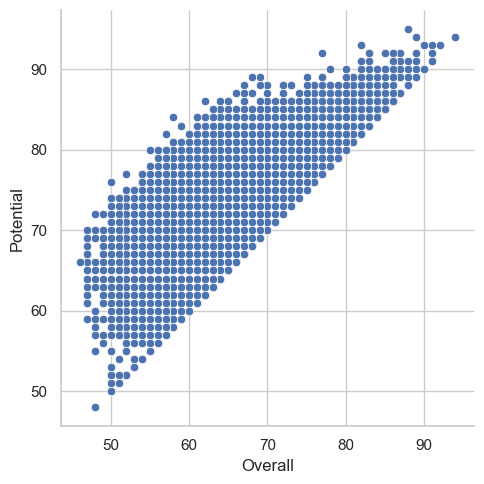

In [44]:
g = sns.relplot(x="Overall", y="Potential", data=fifa19)
plt.show()

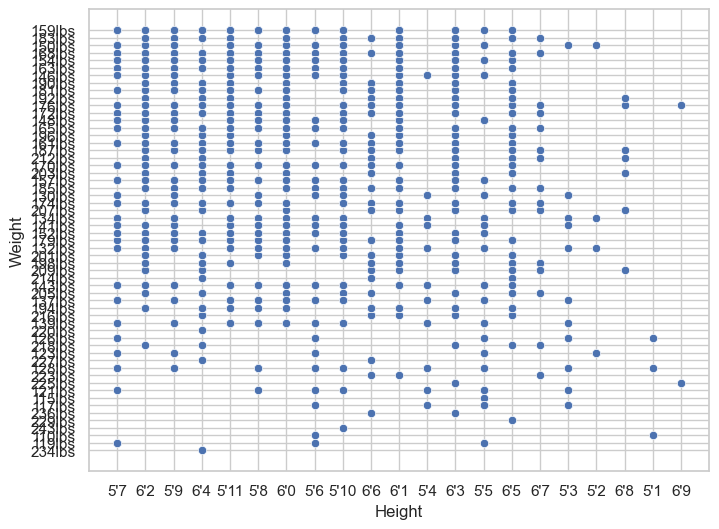

In [45]:
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x="Height", y="Weight", data=fifa19)
plt.show()

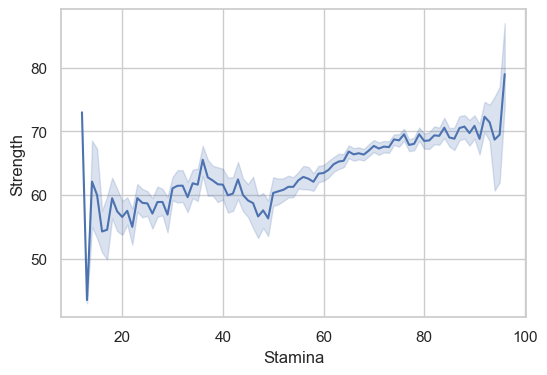

In [46]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa19)
plt.show()

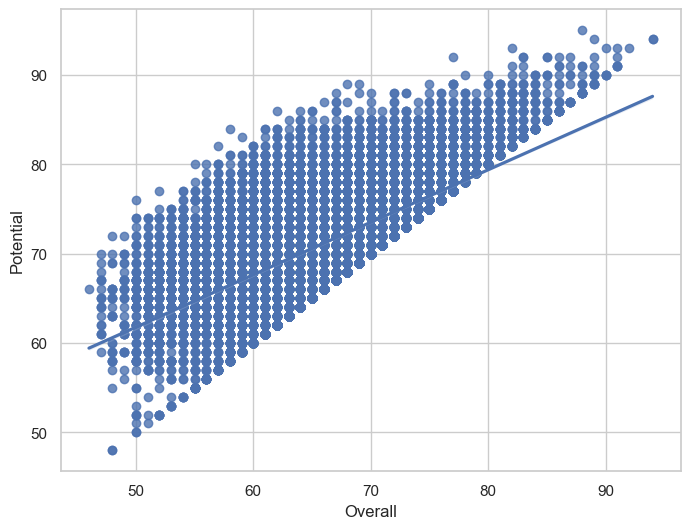

In [47]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19)
plt.show()

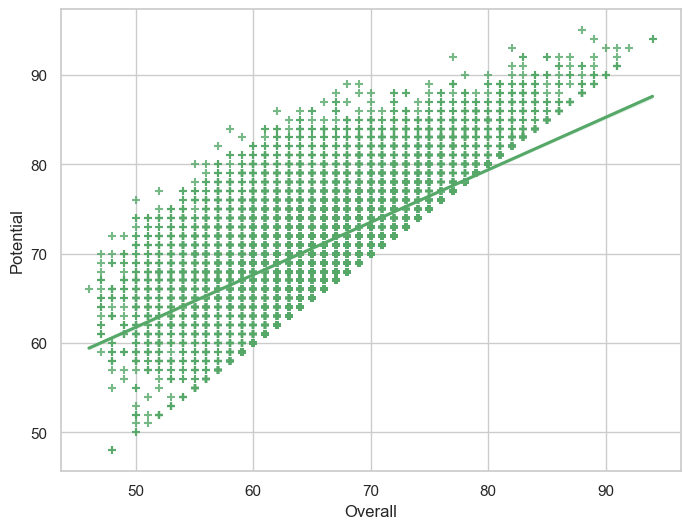

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19, color= "g", marker="+")
plt.show()

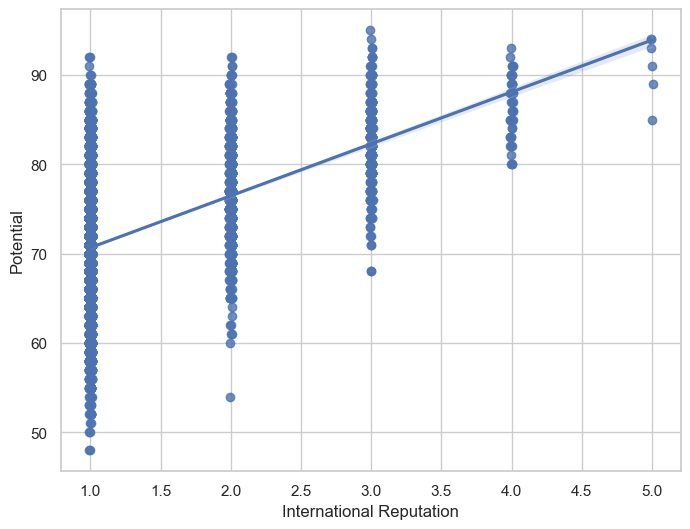

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa19, x_jitter=.01)
plt.show()

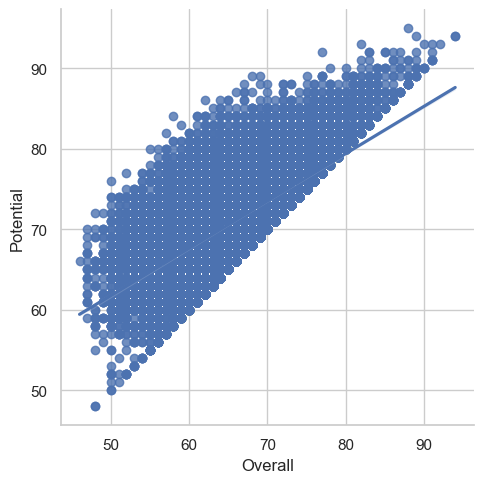

In [50]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa19)
plt.show()

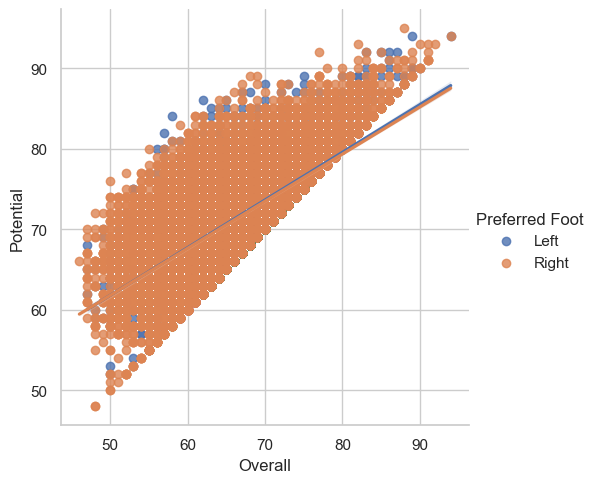

In [51]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

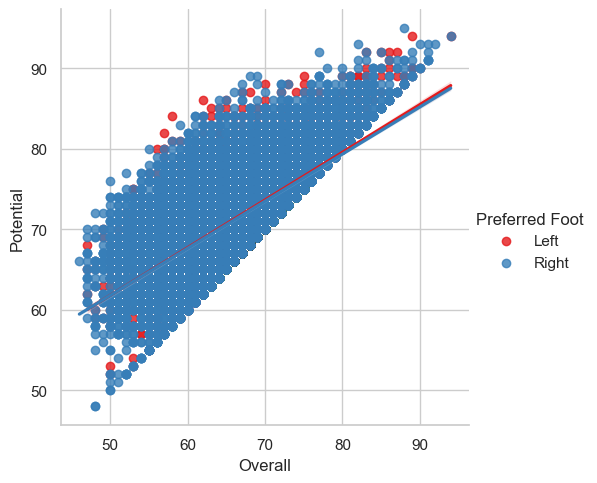

In [52]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set1")
plt.show()

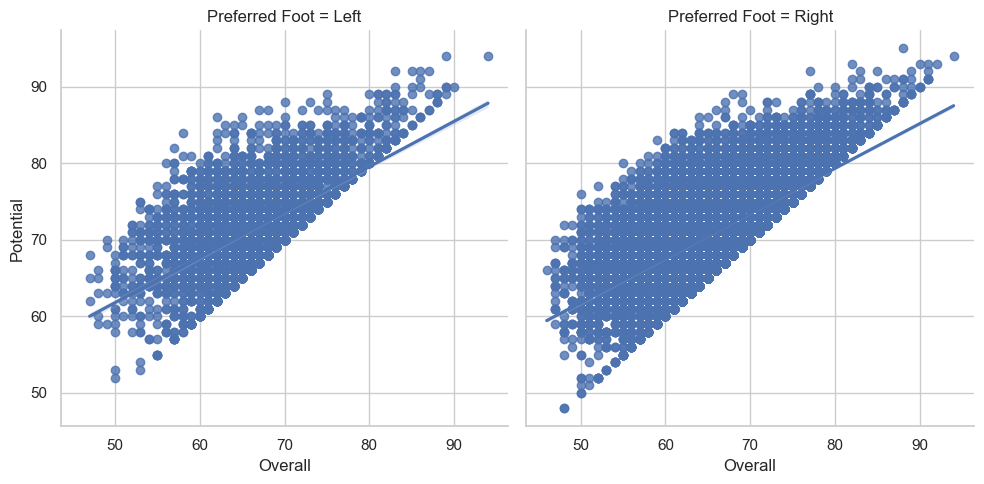

In [53]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19)
plt.show()

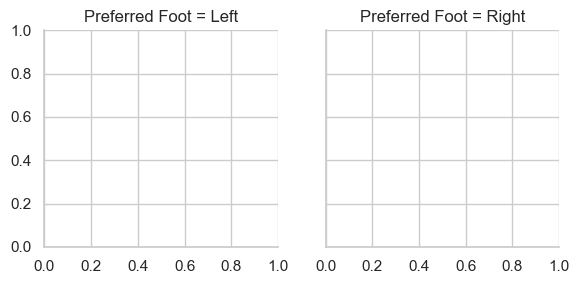

In [54]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
plt.show()

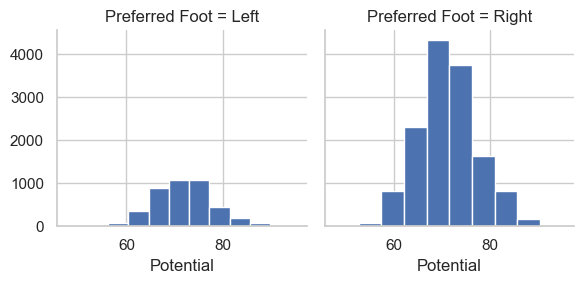

In [55]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential")
plt.show()

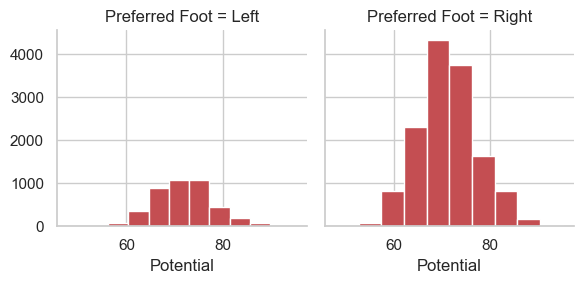

In [56]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")
plt.show()

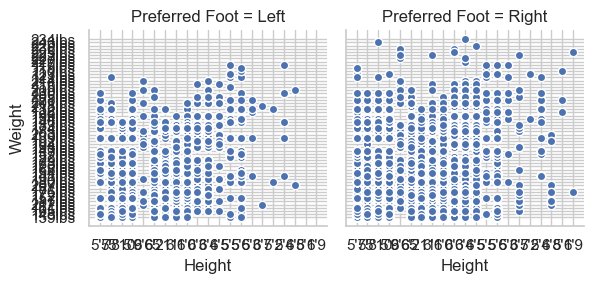

In [57]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())
plt.show()

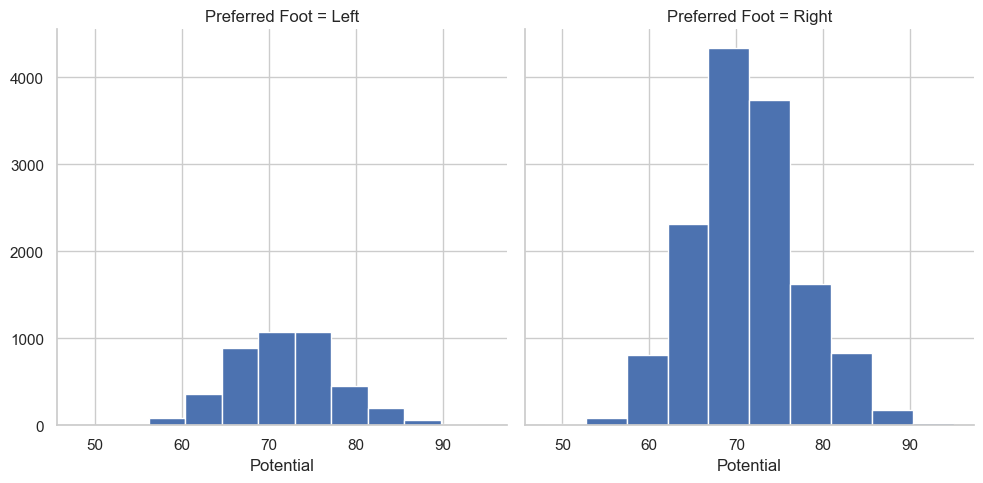

In [58]:
g = sns.FacetGrid(fifa19, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")
plt.show()

In [59]:
fifa19_new = fifa19[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

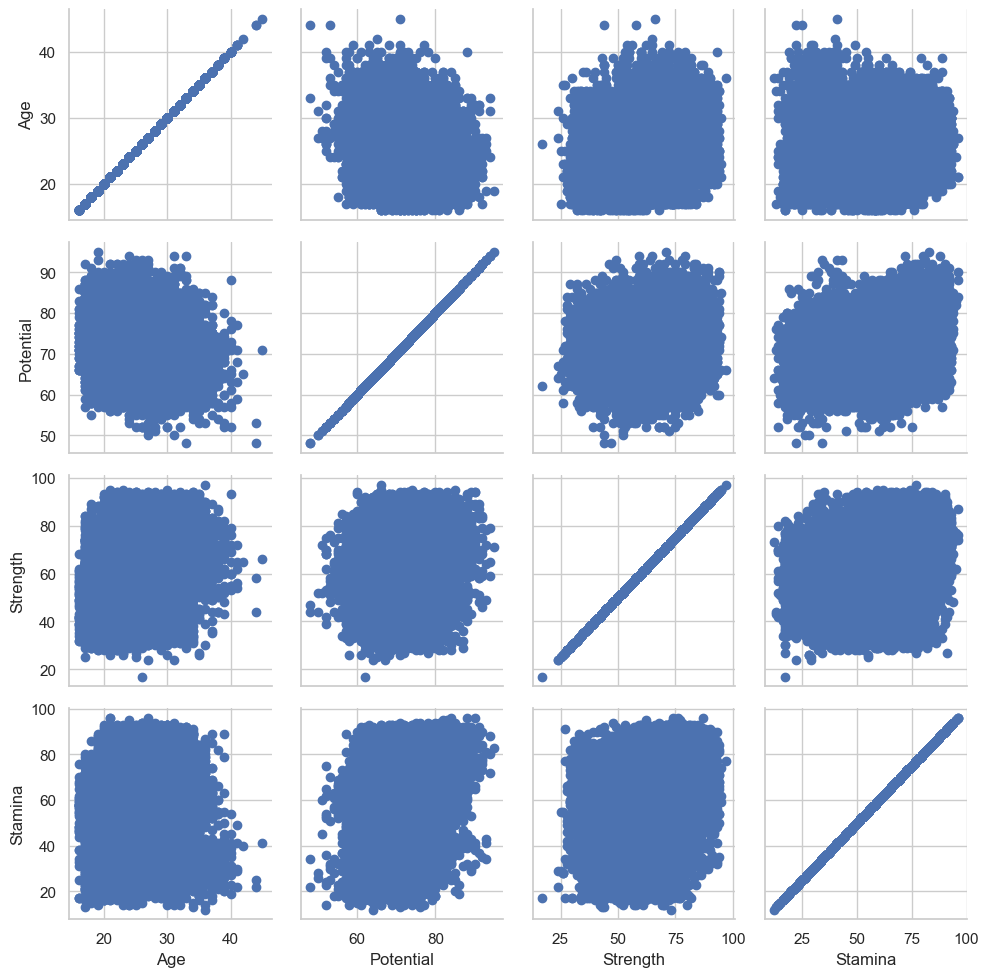

In [60]:
g = sns.PairGrid(fifa19_new)
g = g.map(plt.scatter)
plt.show()

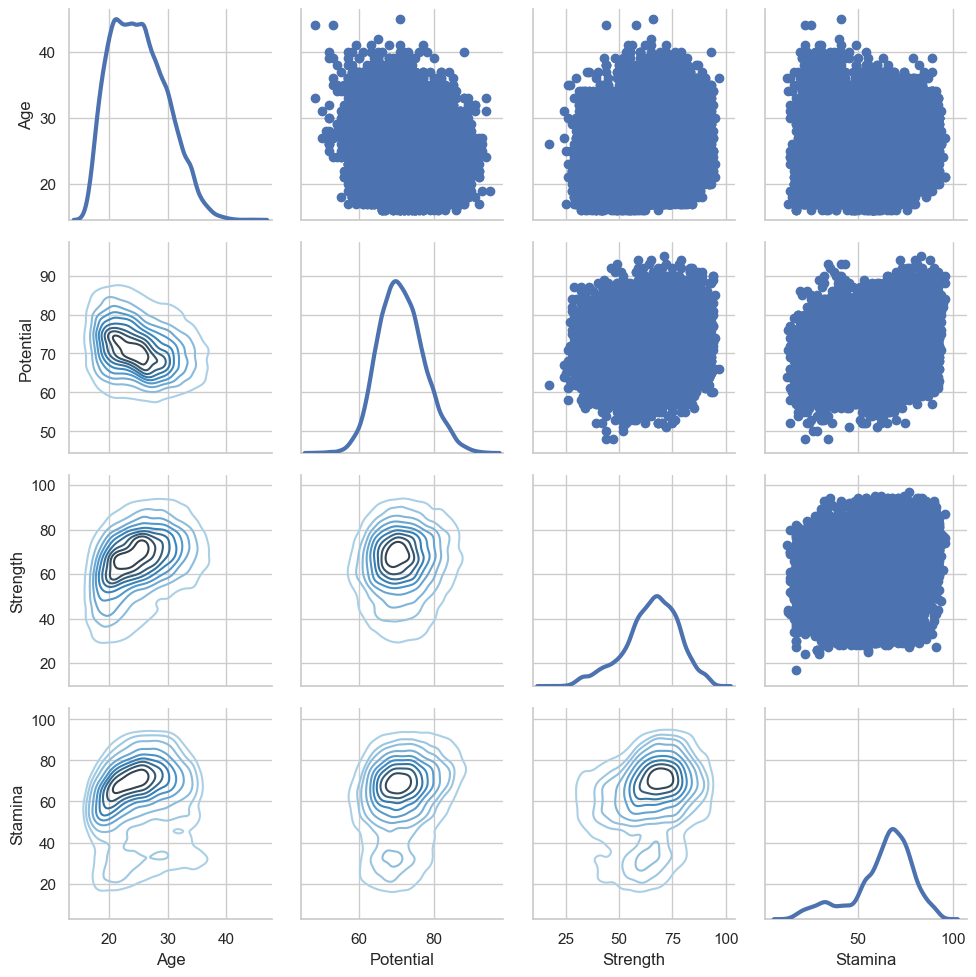

In [61]:
g = sns.PairGrid(fifa19_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

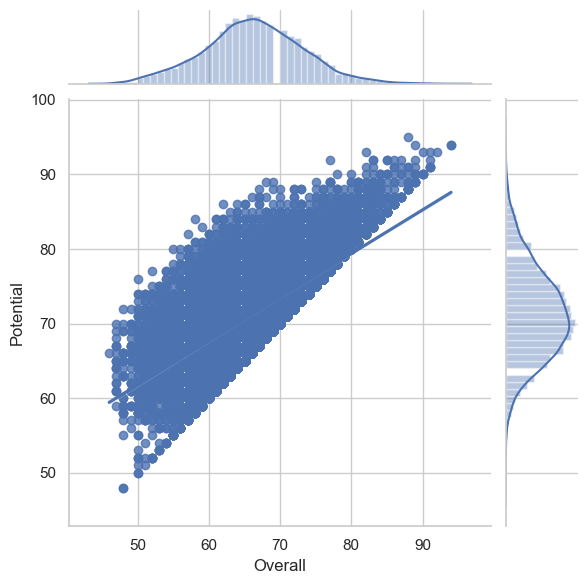

In [62]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

In [63]:
import matplotlib.pyplot as plt

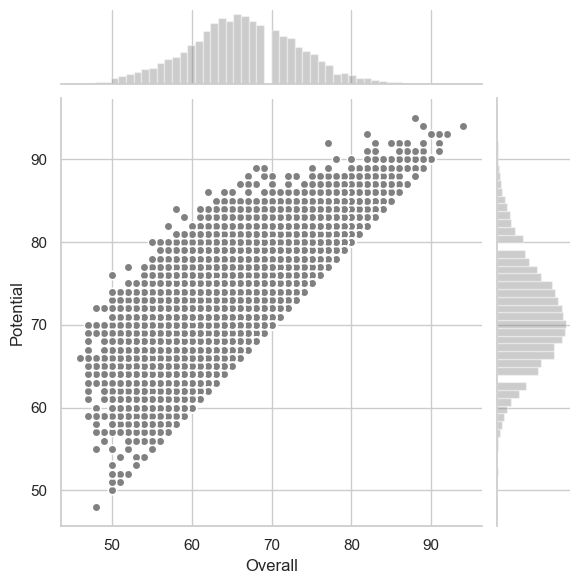

In [64]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")
plt.show()

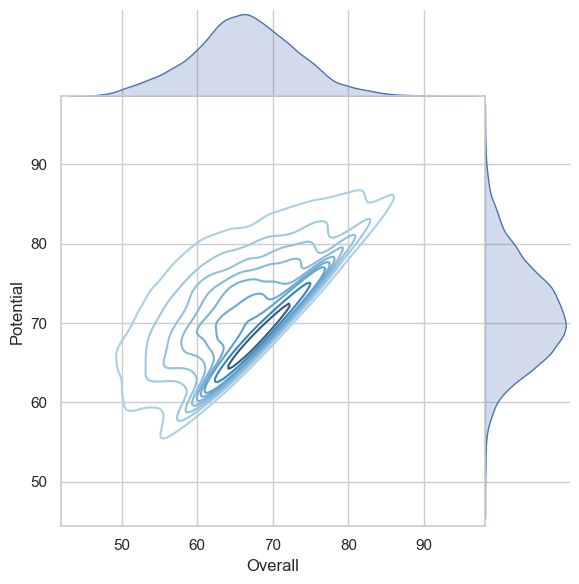

In [65]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

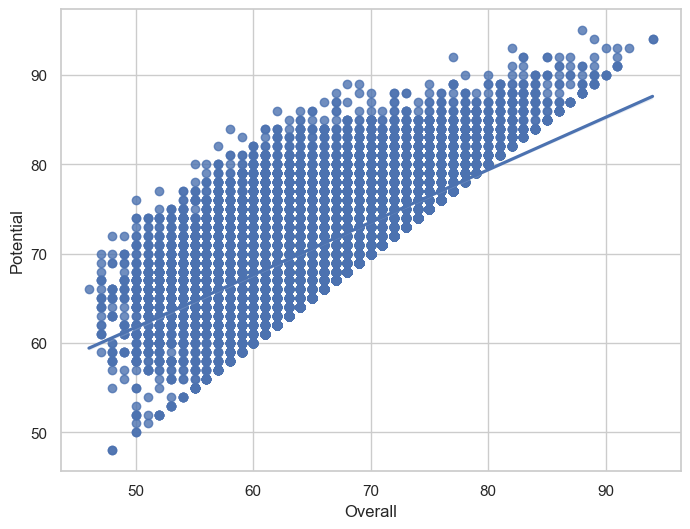

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19);
plt.show()

In [67]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

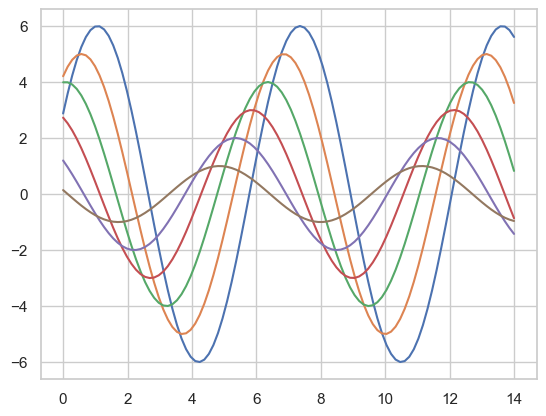

In [68]:
sinplot()
plt.show()